# Comparing Model Wind Data to Observed Wind Data

---

## Overview
If you have an introductory paragraph, lead with it here! Keep it short and tied to your material, then be sure to continue into the required list of topics below,

1. Brief Discussion of the WFIP3 Project
1. Downloading and Plotting Model Data with Herbie
1. Downloading and Plotting Observed Wind Data
1. Comparing Model and Observed Data

## Prerequisites

This notebook will involve use of Herbie and the Atmospheric Community Toolkit (ACT) to download/read in data.  It also relies on MetPy to handle a couple calculations and MatPlotLib for plotting purposes.

| Concepts | Importance | Notes |
| --- | --- | --- |
| ACT | Necessary | |
| Herbie | Necessary | |
| MetPy | Helpful | |
| NumPy | Helpful | |
| MatPlotLib | Necessary | | 

- **Time to learn**: 60 Minutes
- **System requirements** (Preferably the latest version of each):
    - Python
    - ACT
    - MetPy
    - Herbie
    - numpy
    - matplotlib

---

## Imports

In [1]:
import act
from herbie import Herbie
import matplotlib.pyplot as plt
import numpy as np
import metpy.calc as mpcalc
from metpy.units import units

## Brief Discussion of the WFIP3 Project

---

## Downloading and Plotting Model Data with Herbie

We will begin by first looking at model data using a module called Herbie.  Herbie allows us to retrieve archived data from several models, but we will be focusing on the High Resolution Rapid Refresh (HRRR) model.  For now let's just focus on the 24-hour forecast.  You will be asked to input a year, month, and day.

In [2]:
#For best results, try  dates within the range 04/17/2024-05/15/2024 
yr=input('Year (yyyy):')
m=input('Month (mm):')
dd=input('Day (dd):')
H=[]
ds=[]
for a in range(0, 25):
    H.append(Herbie(f"{yr}-{m}-{dd}",  # model run date
        model="hrrr",  # model name
        product="prs", #product
        fxx=a,  # forecast lead time
              ))
    #Keep level set to 1000 mb since that's the closest level to the observed data
    ds.append(H[a].xarray(f":1000 mb:", remove_grib=False))

Year (yyyy): 2024
Month (mm): 04
Day (dd): 25


✅ Found ┊ model=hrrr ┊ product=prs ┊ 2024-Apr-25 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=prs ┊ 2024-Apr-25 00:00 UTC F01 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=prs ┊ 2024-Apr-25 00:00 UTC F02 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=prs ┊ 2024-Apr-25 00:00 UTC F03 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=prs ┊ 2024-Apr-25 00:00 UTC F04 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=prs ┊ 2024-Apr-25 00:00 UTC F05 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=prs ┊ 2024-Apr-25 00:00 UTC F06 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=prs ┊ 2024-Apr-25 00:00 UTC F07 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=prs ┊ 2024-Apr-25 00:00 UTC F08 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=prs ┊ 2024-Apr-25 00:00 UTC F09 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=prs ┊ 2024-Apr-25 00:00 UTC F10 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr 

### Subsetting for the Three Sites
Here we will subset the data to only the three observation sites:

In [3]:
# I want to find the speed at a certain lat/lon point.
#Coordinates:
#Rhode Island: 41.4456, -71.4357
#Cape Cod: 42.03, -70.049
#Sodar: 41.2453, -70.105
lat = [41.4456, 42.03, 41.2453]
lon = [-71.4357, -70.049, -70.105]
point_ds=[]
for a in range(0, 25):
    ds[a]['longitude'] = (ds[a]['longitude'] + 180) % 360 - 180
    for b in range(0, 3):
        # First, find the index of the grid point nearest a specific lat/lon.   
        abslat = np.abs(ds[a].latitude-lat[b])
        abslon = np.abs(ds[a].longitude-lon[b])
        c = np.maximum(abslon, abslat)
        ([yloc], [xloc]) = np.where(c == np.min(c))
        # Now I can use that index location to get the values at the x/y diminsion
        point_ds.append(ds[a].sel(x=xloc, y=yloc))

Now we calculate the wind speed and direction for each time at each site:

In [4]:
rhod_spd=[]
caco_spd=[]
sodar_spd=[]
rhod_dir=[]
caco_dir=[]
sodar_dir=[]
times=[]
for d in range(0, 75, 3):
    rhod_spd.append((mpcalc.wind_speed(point_ds[d].u.values * units.meter/units.second, point_ds[d].v.values * units.meter/units.second)).m)
    caco_spd.append((mpcalc.wind_speed(point_ds[d+1].u.values * units.meter/units.second, point_ds[d+1].v.values * units.meter/units.second)).m)
    sodar_spd.append((mpcalc.wind_speed(point_ds[d+2].u.values * units.meter/units.second, point_ds[d+2].v.values * units.meter/units.second)).m)
    rhod_dir.append((mpcalc.wind_direction(point_ds[d].u.values * units.meter/units.second, point_ds[d].v.values * units.meter/units.second)).m)
    caco_dir.append((mpcalc.wind_direction(point_ds[d+1].u.values * units.meter/units.second, point_ds[d+1].v.values * units.meter/units.second)).m)
    sodar_dir.append((mpcalc.wind_direction(point_ds[d+2].u.values * units.meter/units.second, point_ds[d+2].v.values * units.meter/units.second)).m)
    times.append(point_ds[d].valid_time.values)

### Plotting the Data
Now it's time to plot the variables.  First we will look at wind speed:

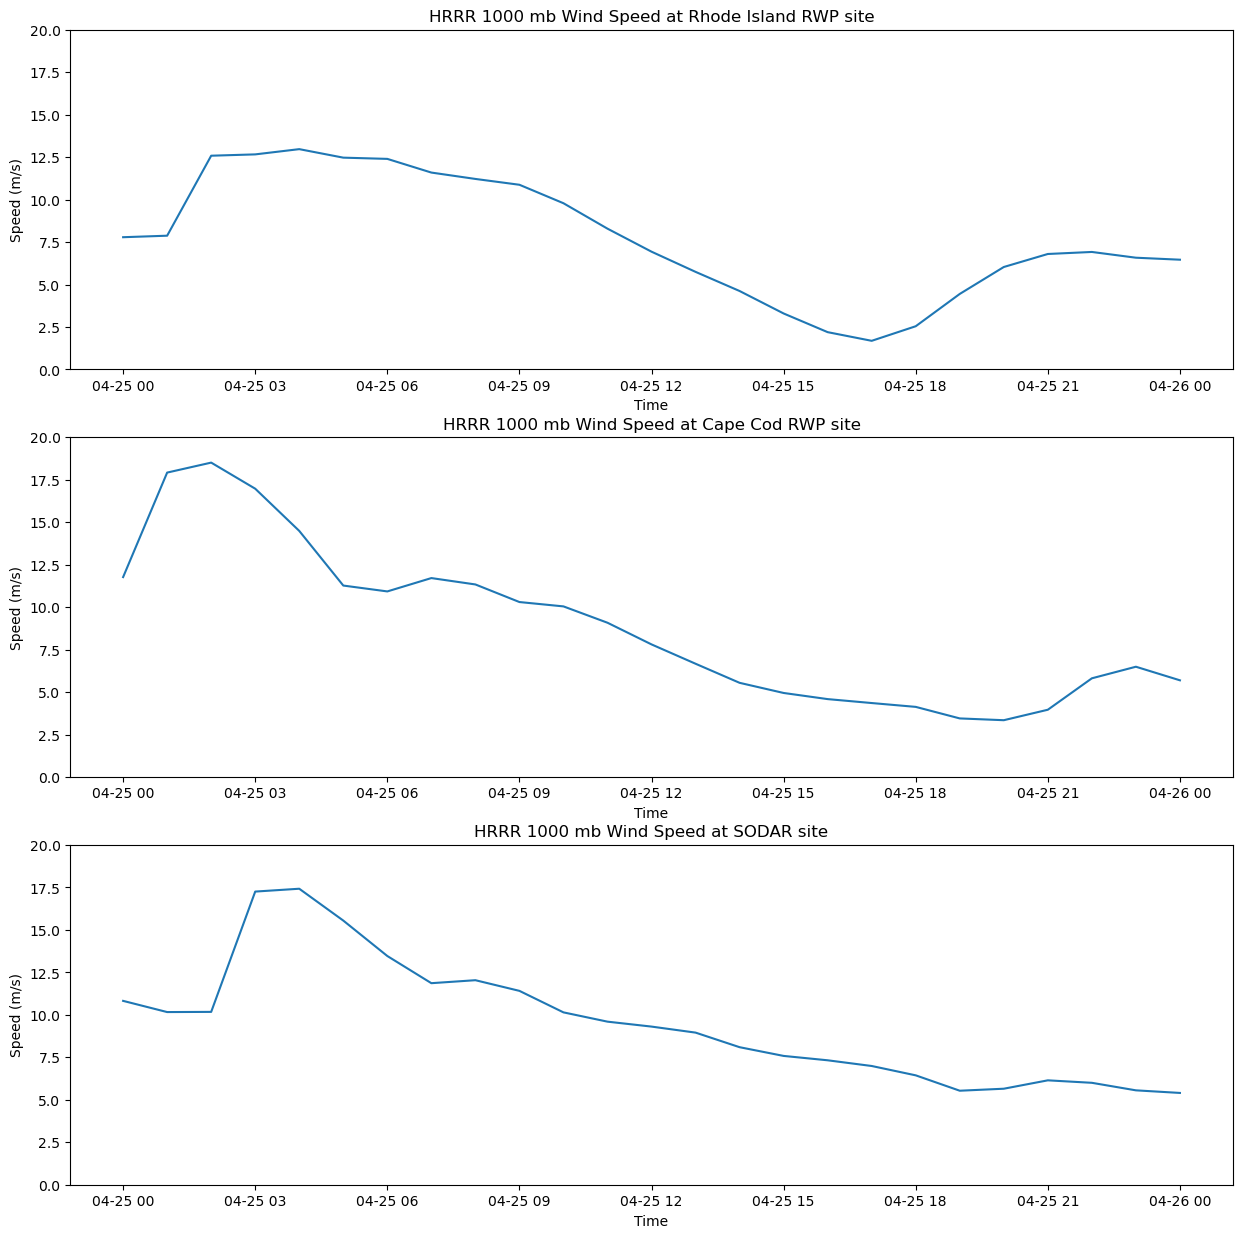

In [5]:
plt.figure(figsize=(15, 15))
ax = plt.subplot(311)
ax.plot(times, rhod_spd)
ax.set_title(f'HRRR 1000 mb Wind Speed at Rhode Island RWP site')
ax.set_ylabel('Speed (m/s)')
ax.set_ylim(0, 20)
ax.set_xlabel('Time')
ax = plt.subplot(312)
ax.plot(times, caco_spd)
ax.set_title(f'HRRR 1000 mb Wind Speed at Cape Cod RWP site')
ax.set_ylabel('Speed (m/s)')
ax.set_ylim(0, 20)
ax.set_xlabel('Time')
ax = plt.subplot(313)
ax.plot(times, sodar_spd)
ax.set_title(f'HRRR 1000 mb Wind Speed at SODAR site')
ax.set_ylabel('Speed (m/s)')
ax.set_ylim(0, 20)
ax.set_xlabel('Time')
plt.savefig(f'../../../Downloads/{yr}{m}{dd}_HRRRspd.png', bbox_inches='tight', dpi=150)

And now wind direction:

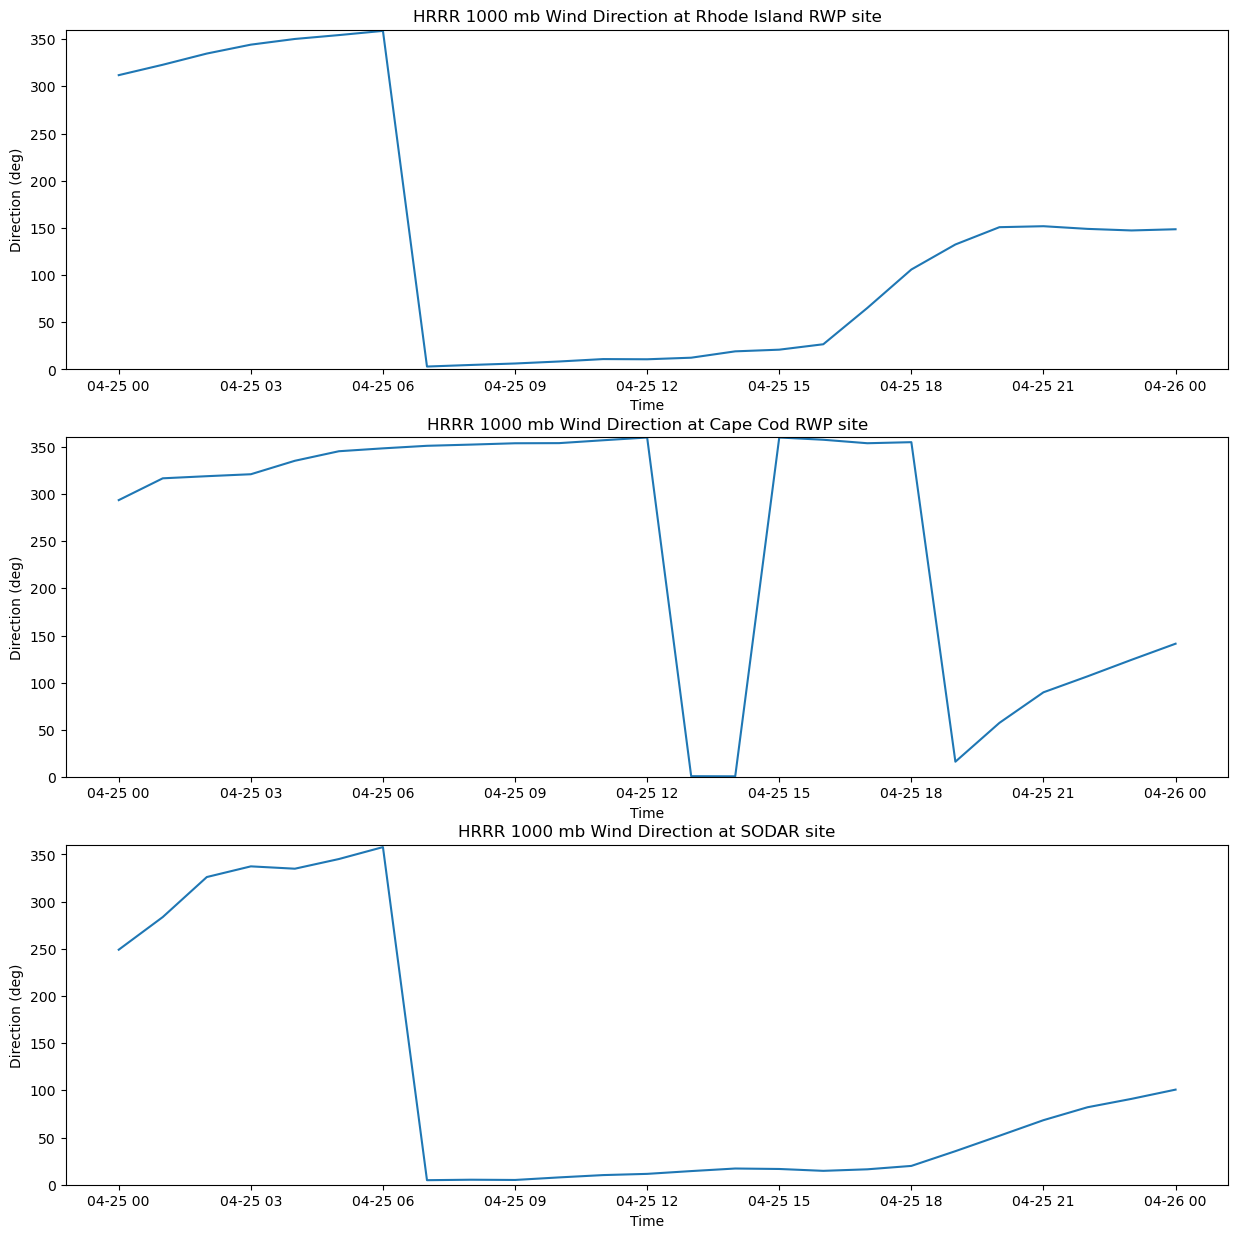

In [6]:
plt.figure(figsize=(15, 15))
ax = plt.subplot(311)
ax.plot(times, rhod_dir)
ax.set_title(f'HRRR 1000 mb Wind Direction at Rhode Island RWP site')
ax.set_ylabel('Direction (deg)')
ax.set_ylim(0, 360)
ax.set_xlabel('Time')
ax = plt.subplot(312)
ax.plot(times, caco_dir)
ax.set_title(f'HRRR 1000 mb Wind Direction at Cape Cod RWP site')
ax.set_ylabel('Direction (deg)')
ax.set_ylim(0, 360)
ax.set_xlabel('Time')
ax = plt.subplot(313)
ax.plot(times, sodar_dir)
ax.set_title(f'HRRR 1000 mb Wind Direction at SODAR site')
ax.set_ylabel('Direction (deg)')
ax.set_ylim(0, 360)
ax.set_xlabel('Time')
plt.savefig(f'../../../Downloads/{yr}{m}{dd}_HRRRdir.png', bbox_inches='tight', dpi=150)


## Downloading and Plotting Observed Wind Data
We have our model data downloaded and plotted, now it's time to do the same with our observed data from the wind profilers and sodar.  **NOTE:** If an error occurs here, it is likely due to the datafile for your date of choice not being available for one or more instruments.  You might have to go back a few times and try different dates.  Yes, it can get frustrating.

In [7]:
#Read in the Rhode Island Data.
ds1, ds2 = act.io.read_psl_wind_profiler(f"../data/rhod-rwp-raw/rhod.rwp.z01.00.{yr}{m}{dd}.000000.winds.cns", 
                                         transpose=False)
#Read in the Cape Cod data.
ds3, ds4 = act.io.read_psl_wind_profiler(f"../data/caco-rwp-raw/caco.rwp.z01.00.{yr}{m}{dd}.000000.winds.cns", 
                                         transpose=False)
# Call the read_sodar function.
# More information on the sodar can be found here:
# https://www.scintec.com/products/flat-array-sodar-mfas/
ds5 = act.io.read_mfas_sodar(f'../data/nant-sodar-raw/nant.sodar.z01.00.{yr}{m}{dd}.000000.mnd')

C:\Users\nickm\miniconda3\envs\forecasting-dev\Lib\site-packages\xarray\core\dataset.py:4743: UserWarning: No index created for dimension time because variable time is not a coordinate. To create an index for time, please first call `.set_coords('time')` on this object.
  warnings.warn(
C:\Users\nickm\miniconda3\envs\forecasting-dev\Lib\site-packages\xarray\core\dataset.py:4743: UserWarning: No index created for dimension time because variable time is not a coordinate. To create an index for time, please first call `.set_coords('time')` on this object.
  warnings.warn(


### Subsetting and Plotting
Now we need to subset the data from each instrument to similar heights and then we can plot it up.  Again, we will plot wind speed first:

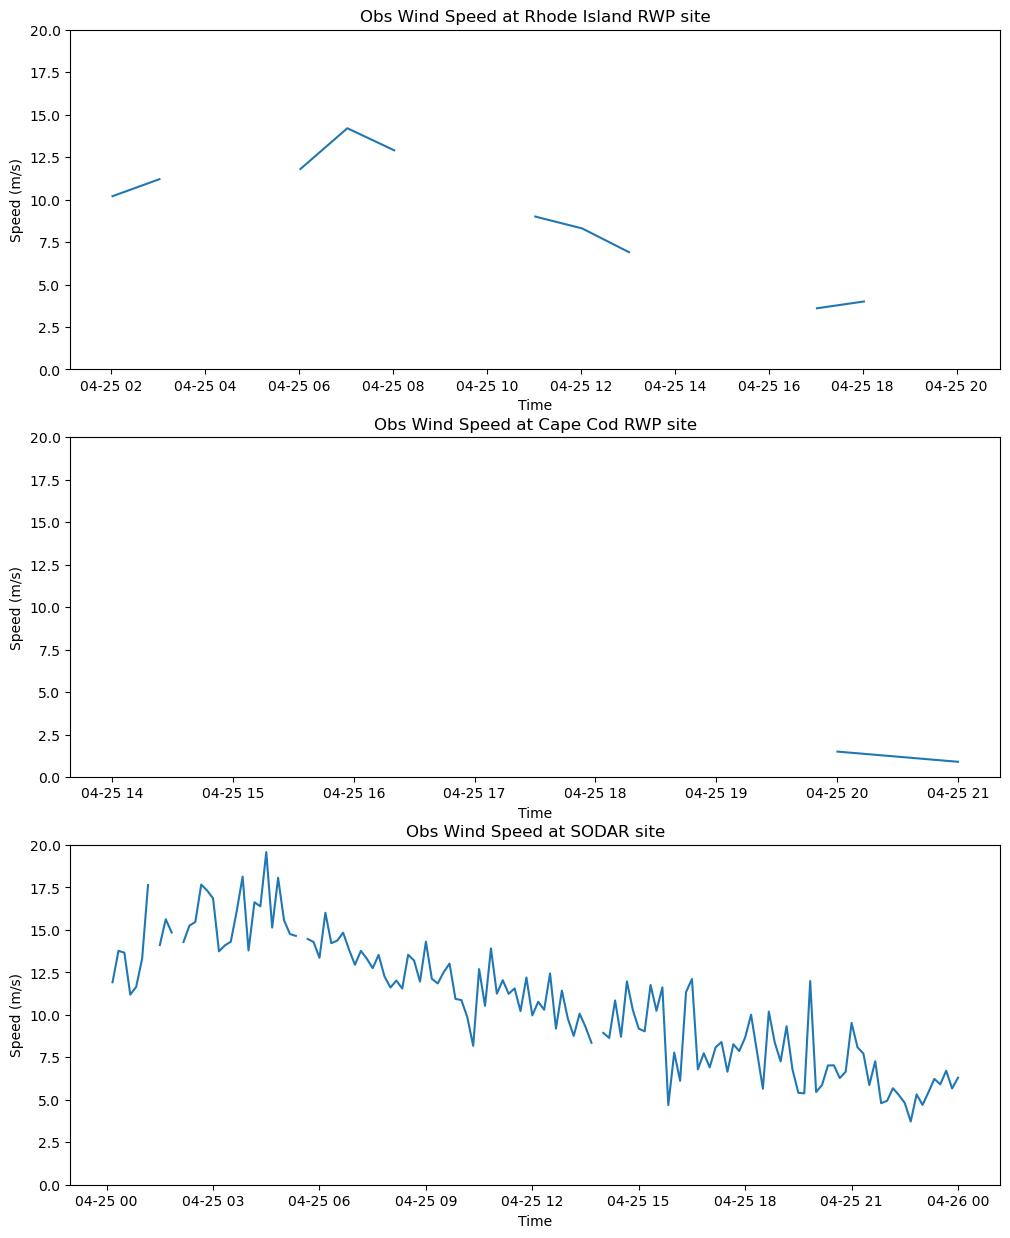

In [8]:
ds1_height=ds1.sel(HT=0.195)
ds3_height=ds3.sel(HT=0.192)
ds5_height=ds5.sel(height = 190)
plt.figure(1, figsize=(12, 15))
ax=plt.subplot(311)
ax.plot(ds1_height.time, ds1_height.SPD)
ax.set_title(f'Obs Wind Speed at Rhode Island RWP site')
ax.set_ylabel('Speed (m/s)')
ax.set_ylim(0, 20)
ax.set_xlabel('Time')
ax = plt.subplot(312)
ax.plot(ds3_height.time, ds3_height.SPD)
ax.set_title(f'Obs Wind Speed at Cape Cod RWP site')
ax.set_ylabel('Speed (m/s)')
ax.set_ylim(0, 20)
ax.set_xlabel('Time')
ax = plt.subplot(313)
ax. plot(ds5_height.time, ds5_height.speed)
ax.set_title(f'Obs Wind Speed at SODAR site')
ax.set_ylabel('Speed (m/s)')
ax.set_ylim(0, 20)
ax.set_xlabel('Time')
plt.savefig(f'../../../Downloads/{yr}{m}{dd}_Obsspd.png', bbox_inches='tight', dpi=150)

And once again, wind direction:

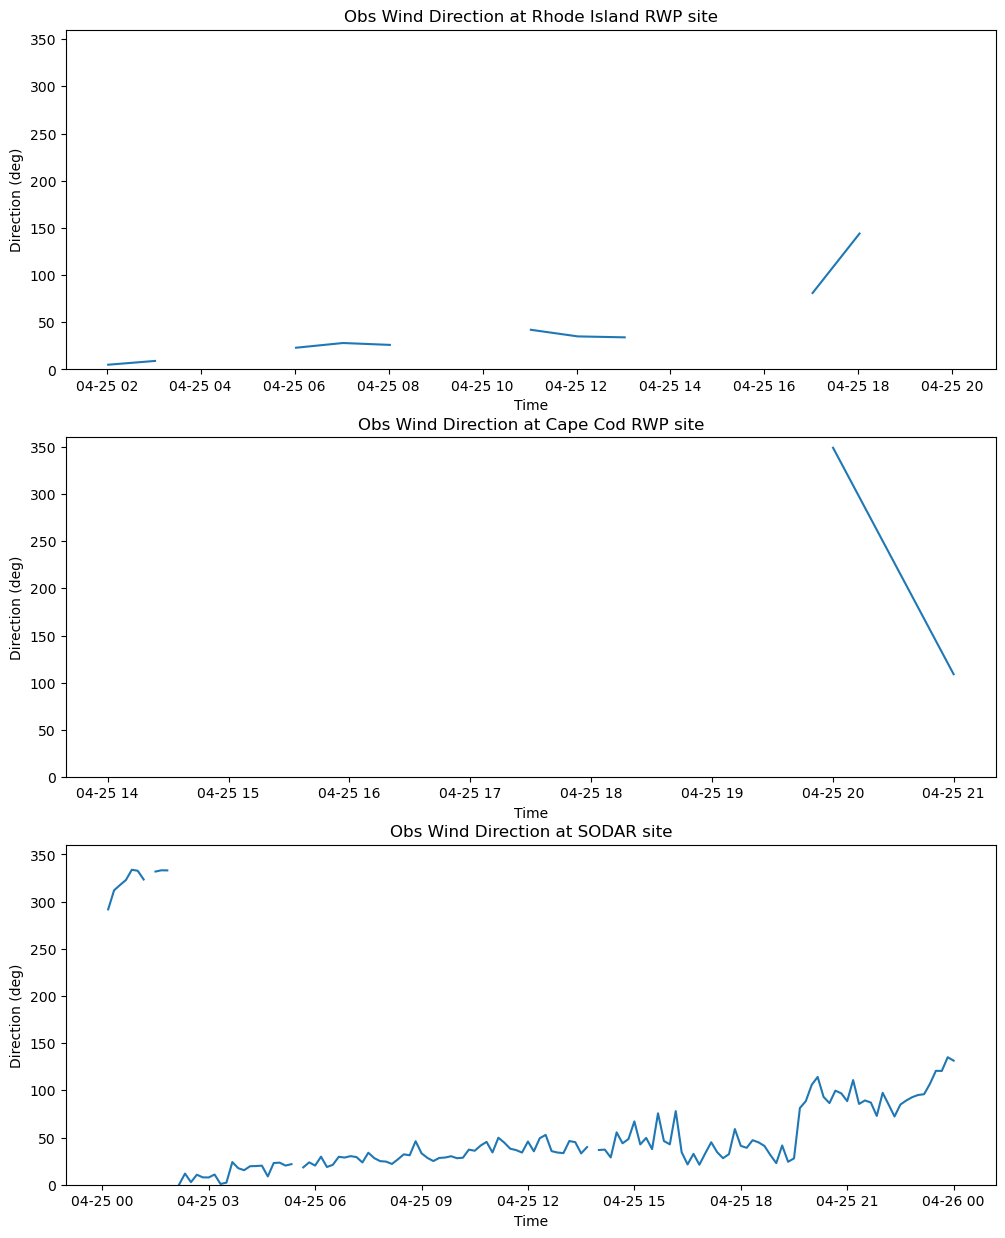

In [9]:
plt.figure(1, figsize=(12, 15))
ax=plt.subplot(311)
ax.plot(ds1_height.time, ds1_height.DIR)
ax.set_title(f'Obs Wind Direction at Rhode Island RWP site')
ax.set_ylabel('Direction (deg)')
ax.set_ylim(0, 360)
ax.set_xlabel('Time')
ax = plt.subplot(312)
ax.plot(ds3_height.time, ds3_height.DIR)
ax.set_title(f'Obs Wind Direction at Cape Cod RWP site')
ax.set_ylabel('Direction (deg)')
ax.set_ylim(0, 360)
ax.set_xlabel('Time')
ax = plt.subplot(313)
ax.plot(ds5_height.time, ds5_height.dir)
ax.set_title(f'Obs Wind Direction at SODAR site')
ax.set_ylabel('Direction (deg)')
ax.set_ylim(0, 360)
ax.set_xlabel('Time')
plt.savefig(f'../../../Downloads/{yr}{m}{dd}_Obsdir.png', bbox_inches='tight', dpi=150)

## Comparing Model and Observed Data

Here is the good stuff.  This is where we put everything together, looking at both the model and observed wind data on the same graph.  First we will compare the wind speed data:

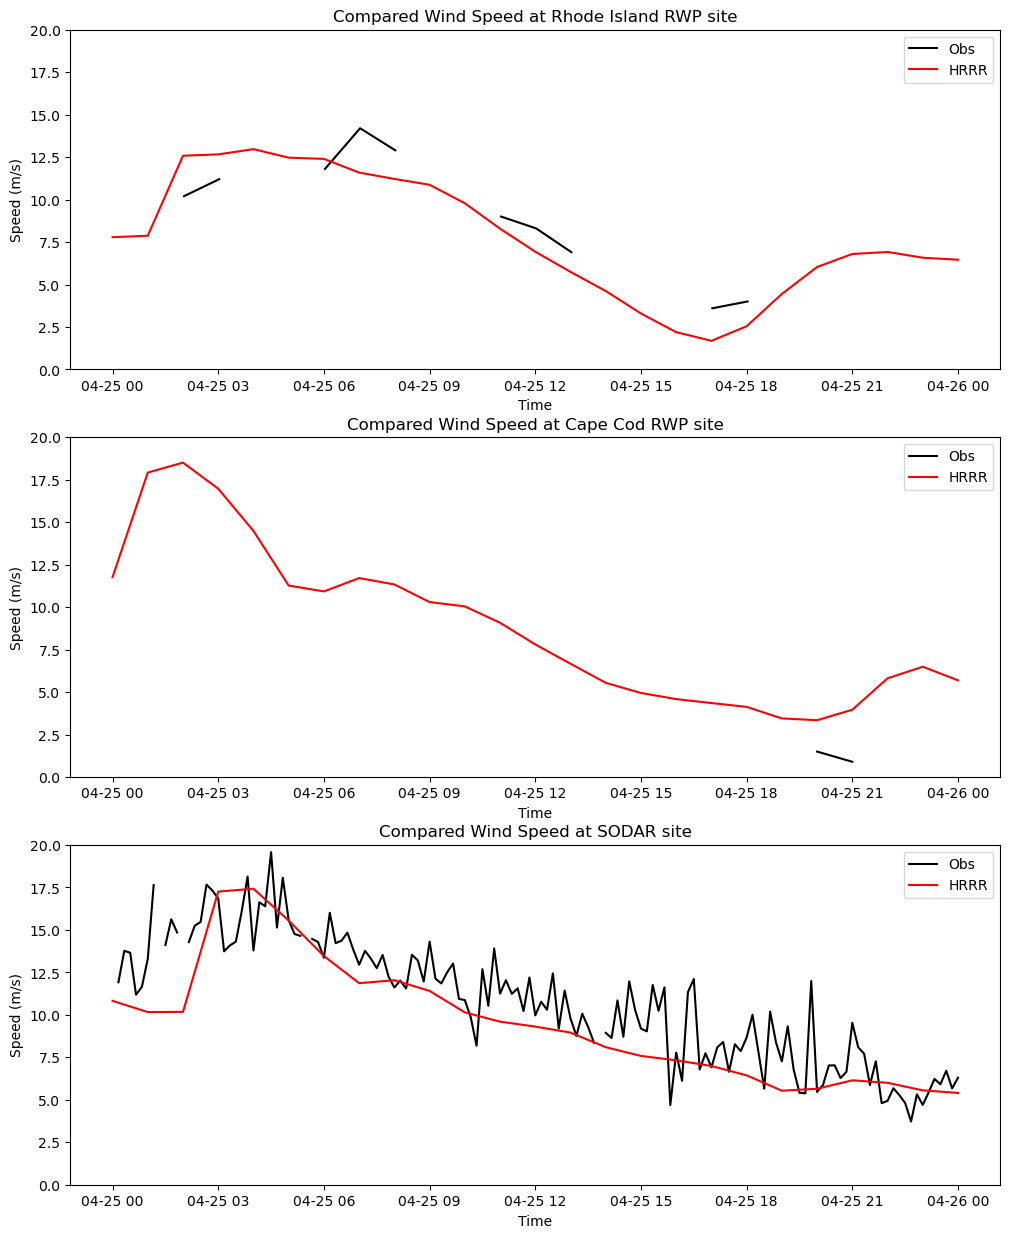

In [10]:
plt.figure(1, figsize=(12,15))
ax=plt.subplot(311)
ax.plot(ds1_height.time, ds1_height.SPD, color='black', label = 'Obs')
ax.plot(times, rhod_spd, color='red', label = 'HRRR')
ax.set_title(f'Compared Wind Speed at Rhode Island RWP site')
ax.set_ylabel('Speed (m/s)')
ax.set_ylim(0, 20)
ax.set_xlabel('Time')
ax.legend()
ax=plt.subplot(312)
ax.plot(ds3_height.time, ds3_height.SPD, color='black', label = 'Obs')
ax.plot(times, caco_spd, color='red', label = 'HRRR')
ax.set_title(f'Compared Wind Speed at Cape Cod RWP site')
ax.set_ylabel('Speed (m/s)')
ax.set_ylim(0, 20)
ax.set_xlabel('Time')
ax.legend()
ax=plt.subplot(313)
ax.plot(ds5_height.time, ds5_height.speed, color='black', label = 'Obs')
ax.plot(times, sodar_spd, color='red', label = 'HRRR')
ax.set_title(f'Compared Wind Speed at SODAR site')
ax.set_ylabel('Speed (m/s)')
ax.set_ylim(0, 20)
ax.set_xlabel('Time')
ax.legend()
plt.savefig(f'../../../Downloads/{yr}{m}{dd}_Comparisonspd.png', bbox_inches='tight', dpi=150)

Finally, we will compare the wind direction data:

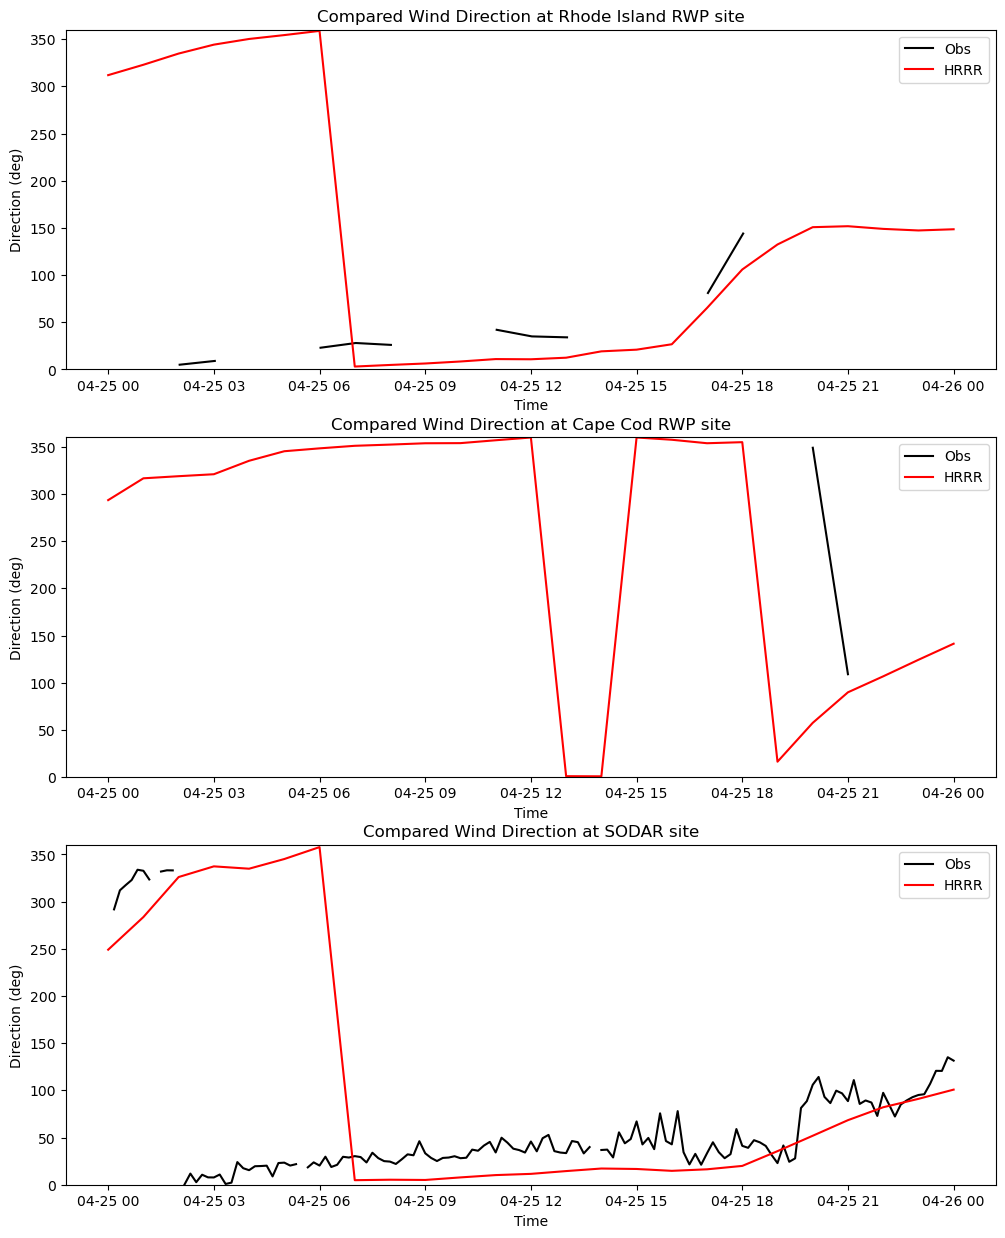

In [11]:
plt.figure(1, figsize=(12,15))
ax=plt.subplot(311)
ax.plot(ds1_height.time, ds1_height.DIR, color='black', label='Obs')
ax.plot(times, rhod_dir, color='red', label='HRRR')
ax.set_title(f'Compared Wind Direction at Rhode Island RWP site')
ax.set_ylabel('Direction (deg)')
ax.set_ylim(0, 360)
ax.set_xlabel('Time')
ax.legend()
ax=plt.subplot(312)
ax.plot(ds3_height.time, ds3_height.DIR, color='black', label = 'Obs')
ax.plot(times, caco_dir, color='red', label = 'HRRR')
ax.set_title(f'Compared Wind Direction at Cape Cod RWP site')
ax.set_ylabel('Direction (deg)')
ax.set_ylim(0, 360)
ax.set_xlabel('Time')
ax.legend()
ax=plt.subplot(313)
ax.plot(ds5_height.time, ds5_height.dir, color='black', label = 'Obs')
ax.plot(times, sodar_dir, color='red', label = 'HRRR')
ax.set_title(f'Compared Wind Direction at SODAR site')
ax.set_ylabel('Direction (deg)')
ax.set_ylim(0, 360)
ax.set_xlabel('Time')
ax.legend()
plt.savefig(f'../../../Downloads/{yr}{m}{dd}_Comparisondir.png', bbox_inches='tight', dpi=150)

In [12]:
sodar_spd2=[]
sodar_dir2=[]
for f in range(0, 24):
    for g in range(0,6):
        sodar_spd2.append(sodar_spd[f])
        sodar_dir2.append(sodar_dir[f])
zero_line=[]
for h in range(0, 144):
    zero_line.append(0)

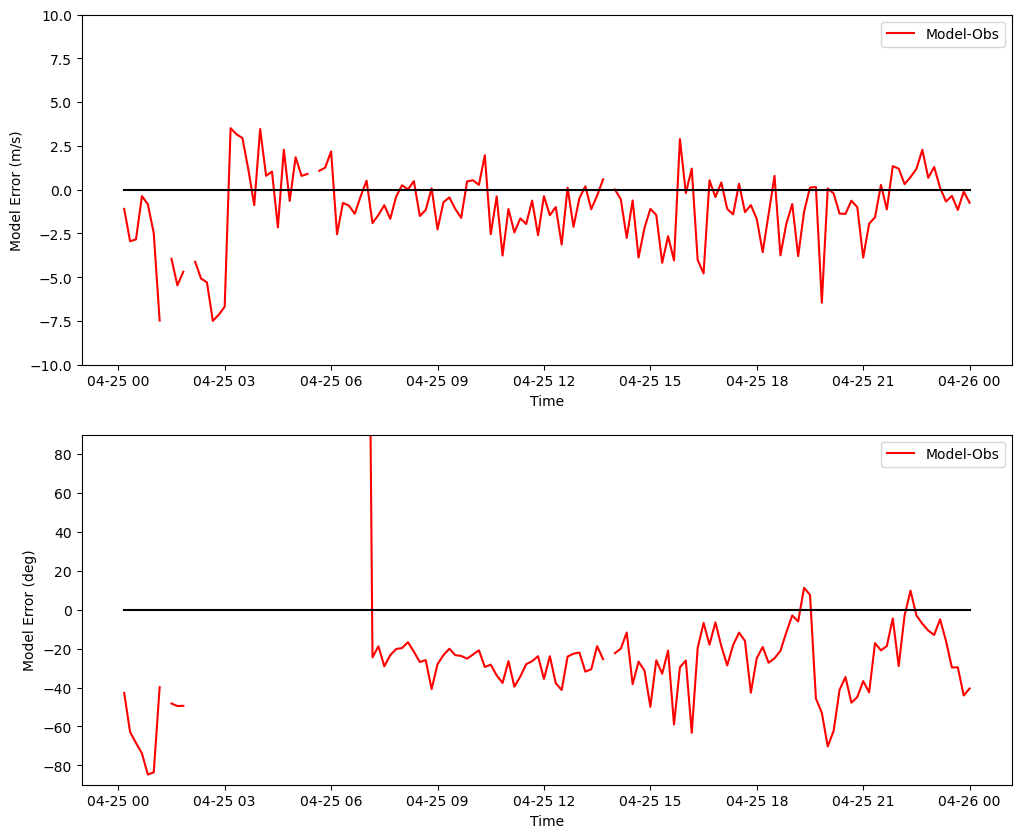

In [13]:
plt.figure(1, figsize = (12, 10))
ax = plt.subplot(211)
ax.plot(ds5_height.time, sodar_spd2-ds5_height.speed, color='red', label='Model-Obs')
ax.plot(ds5_height.time, zero_line, color='black')
ax.set_ylabel('Model Error (m/s)')
ax.set_ylim(-10, 10)
ax.set_xlabel('Time')
ax.legend()
ax = plt.subplot(212)
ax.plot(ds5_height.time, sodar_dir2-ds5_height.dir, color='red', label='Model-Obs')
ax.plot(ds5_height.time, zero_line, color='black')
ax.set_ylabel('Model Error (deg)')
ax.set_ylim(-90, 90)
ax.set_xlabel('Time')
ax.legend()
plt.savefig(f'../../../Downloads/{yr}{m}{dd}_MEsodar.png', bbox_inches='tight', dpi=150)

We also suggest checking out Jupyter Book's [brief demonstration](https://jupyterbook.org/content/metadata.html#jupyter-cell-tags) on adding cell tags to your cells in Jupyter Notebook, Lab, or manually. Using these cell tags can allow you to [customize](https://jupyterbook.org/interactive/hiding.html) how your code content is displayed and even [demonstrate errors](https://jupyterbook.org/content/execute.html#dealing-with-code-that-raises-errors) without altogether crashing our loyal army of machines!

---

## Summary
Add one final `---` marking the end of your body of content, and then conclude with a brief single paragraph summarizing at a high level the key pieces that were learned and how they tied to your objectives. Look to reiterate what the most important takeaways were.

### What's next?
Let Jupyter book tie this to the next (sequential) piece of content that people could move on to down below and in the sidebar. However, if this page uniquely enables your reader to tackle other nonsequential concepts throughout this book, or even external content, link to it here!

## Resources and references
Finally, be rigorous in your citations and references as necessary. Give credit where credit is due. Also, feel free to link to relevant external material, further reading, documentation, etc. Then you're done! Give yourself a quick review, a high five, and send us a pull request. A few final notes:
 - `Kernel > Restart Kernel and Run All Cells...` to confirm that your notebook will cleanly run from start to finish
 - `Kernel > Restart Kernel and Clear All Outputs...` before committing your notebook, our machines will do the heavy lifting
 - Take credit! Provide author contact information if you'd like; if so, consider adding information here at the bottom of your notebook
 - Give credit! Attribute appropriate authorship for referenced code, information, images, etc.
 - Only include what you're legally allowed: **no copyright infringement or plagiarism**
 
Thank you for your contribution!